<h1><a href="www.kaggle.com/devinanzelmo/dota-2-matches">DotA2 Matches dataset</a></h1>

<h2>Описание</h2>
<p>Набор содержит 50000 тысяч матчей ранговых игр. Этот датасет предназначет для оценки поведения игроков, их уровня игры, продолжительности игр, сражений и т.д.</p>
<p>Данные из этого датасета могут использоваться для анализа актуальности выбора определенных героев и предметов, общей модели поведения игроков и девиаций из нее и многого другого. Эти данные полезны, например, при разработке новых обновлений для игры, усовершенствования систем матчмейкинга или наказаний за несоответствующее поведение игроков и прочее.</p>

<div style="padding-left: 2em;">
    <h3>Уточнение для данного задания</h3>
    <p>Для анализа в этом задании выбрана часть датасета с данными по игрокам и героям, на которых они играли конкретный матч. Так как атрибутов получается достаточно много, здесь мы опишем лишь некоторые из них в качестве примера.</p>
</div>

In [1]:
import numpy as np
import pandas as pd

<div style="border: #000000 1px solid; border-radius: 5px; padding: 1em;">
    <h2>Описание выбранных для анализа атрибутов</h2>
    <ul>
        <li> <?--Начало шаблона--?>
            <h4>match_id</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>фыв</td>
                    <td>фыв</td>
                    <td>фыв</td>
                </tr>
            </table>
        </li> <?--Конец шаблона--?>
    </ul>
</div>

In [2]:
#Данные по игрокам
players = pd.read_csv('dataset/players.csv')

#Уточняющие данные по героям
heroes = pd.read_csv('dataset/hero_names.csv')

items = pd.read_csv('dataset/item_ids.csv')

#Соединяем две эти выборки, чтобы можно было получить конкретное имя выбранного игроком героя, вместо id
merged = players.merge(heroes, 'left', on = ["hero_id"])
merged = merged.merge(items, 'left', left_on = ["item_0"], right_on = ["item_id"], suffixes = ['_0', '_1'])
merged = merged.merge(items, 'left', left_on = ["item_1"], right_on = ["item_id"], suffixes = ['_1', '_2'])
merged = merged.merge(items, 'left', left_on = ["item_2"], right_on = ["item_id"], suffixes = ['_2', '_3'])
merged = merged.merge(items, 'left', left_on = ["item_3"], right_on = ["item_id"], suffixes = ['_3', '_4'])
merged = merged.merge(items, 'left', left_on = ["item_4"], right_on = ["item_id"], suffixes = ['_4', '_5'])
merged = merged.merge(items, 'left', left_on = ["item_5"], right_on = ["item_id"], suffixes = ['_5', '_6'])

#Список атрибутов, которые нас интересуют
attrib = ["match_id", "account_id", "player_slot", "localized_name", "kills", "deaths", "assists", 
          "item_name_1", "item_name_2", "item_name_3", "item_name_4", "item_name_5" ,"item_name_6",
          "level", "last_hits", "denies", "hero_damage", "hero_healing", "tower_damage", "stuns", 
          "gold_spent", "gold_per_min", "gold_death", "gold_buyback", "gold_abandon", "gold_sell", "gold_destroying_structure",
          "gold_killing_heros", "gold_killing_creeps", "gold_killing_roshan", "gold_killing_couriers", "gold_other",
          "xp_per_min", "xp_hero", "xp_creep", "xp_roshan", "xp_other", "leaver_status"]

#Пример выборки
merged[attrib]

,match_id,account_id,player_slot,localized_name,kills,deaths,assists,item_name_1,item_name_2,item_name_3,...,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,gold_other,xp_per_min,xp_hero,xp_creep,xp_roshan,xp_other,leaver_status
0,0,0,0,Rubick,9,3,18,arcane_boots,ghost,bracer,...,1087.0,400.0,NaN,50.0,362,8840.0,5440.0,NaN,83.0,0
1,0,1,1,Clockwerk,13,3,18,tpscroll,power_treads,shivas_guard,...,4317.0,937.0,NaN,395.0,659,14331.0,8440.0,2683.0,671.0,0
2,0,0,2,Treant Protector,0,4,15,travel_boots,point_booster,energy_booster,...,3697.0,400.0,NaN,259.0,385,6692.0,8112.0,NaN,453.0,0
3,0,2,3,Shadow Fiend,8,4,19,power_treads,manta,sange_and_yasha,...,10432.0,400.0,NaN,100.0,605,8583.0,14230.0,894.0,293.0,0
4,0,3,4,Spectre,20,3,17,heart,urn_of_shadows,manta,...,9220.0,400.0,NaN,NaN,762,15814.0,14325.0,NaN,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,128,Tusk,16,9,16,silver_edge,bottle,NaN,...,2940.0,400.0,NaN,528.0,626,21496.0,6025.0,596.0,1007.0,0
499996,49999,0,129,Mirana,12,6,11,monkey_king_bar,power_treads,maelstrom,...,4346.0,857.0,175.0,329.0,607,16360.0,9653.0,1490.0,740.0,0
499997,49999,0,130,Keeper of the Light,5,3,11,mekansm,travel_boots,invis_sword,...,3833.0,400.0,175.0,303.0,404,8205.0,10012.0,NaN,600.0,0
499998,49999,0,131,Alchemist,8,6,17,silver_edge,sange_and_yasha,assault,...,12927.0,400.0,175.0,8302.0,703,11773.0,20005.0,596.0,327.0,0


In [3]:
merged.iloc[: , -15:].head()

,unit_order_continue,name,localized_name,item_id_1,item_name_1,item_id_2,item_name_2,item_id_3,item_name_3,item_id_4,item_name_4,item_id_5,item_name_5,item_id_6,item_name_6
0,NaN,npc_dota_hero_rubick,Rubick,180.0,arcane_boots,37.0,ghost,73.0,bracer,56.0,ring_of_health,108.0,ultimate_scepter,NaN,NaN
1,NaN,npc_dota_hero_rattletrap,Clockwerk,46.0,tpscroll,63.0,power_treads,119.0,shivas_guard,102.0,force_staff,24.0,ultimate_orb,108.0,ultimate_scepter
2,NaN,npc_dota_hero_treant,Treant Protector,48.0,travel_boots,60.0,point_booster,59.0,energy_booster,108.0,ultimate_scepter,65.0,hand_of_midas,NaN,NaN
3,NaN,npc_dota_hero_nevermore,Shadow Fiend,63.0,power_treads,147.0,manta,154.0,sange_and_yasha,164.0,helm_of_the_dominator,79.0,mekansm,160.0,skadi
4,NaN,npc_dota_hero_spectre,Spectre,114.0,heart,92.0,urn_of_shadows,147.0,manta,NaN,NaN,137.0,radiance,63.0,power_treads


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Визуализация отдельных показателей</h2>

<h4>Распределение количества потраченного золота</h4>

<AxesSubplot:xlabel='gold_spent', ylabel='Count'>

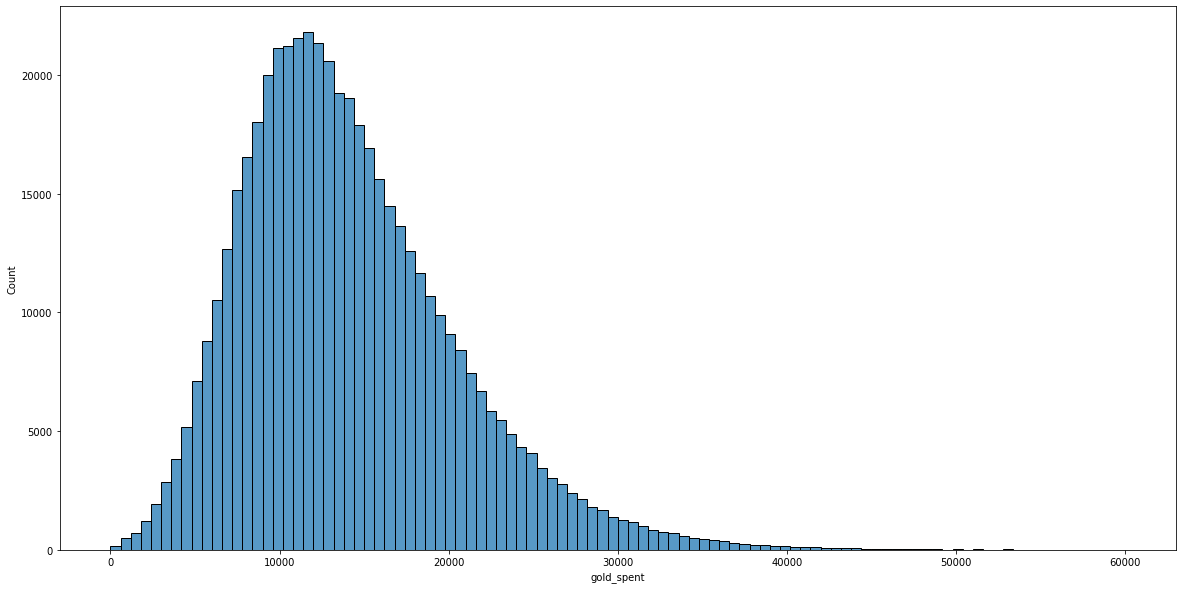

In [5]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(x = "gold_spent", data = merged, bins = 100, binrange = (0, 60000))

<h4>Количество игроков c разным статусом подключения</h4>
<p><i>0 - не покидал матч, 1 - отключался, 2 - отключился на слишком длительное время и покинул игру, 3 - покинул игру, 4 - афк</i></p>

<AxesSubplot:xlabel='leaver_status', ylabel='count'>

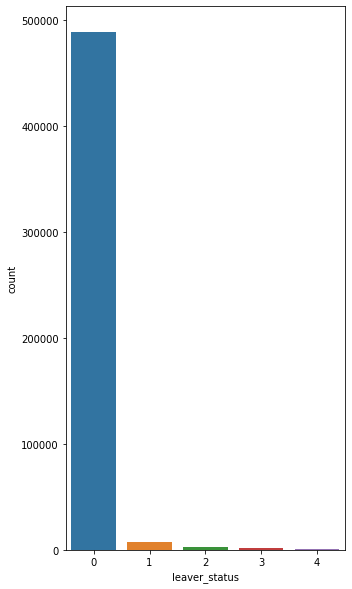

In [6]:
fig = plt.figure(figsize = (5, 10))
sns.countplot(x = "leaver_status", data = merged)

<h4>Частота выбора героев</h4>

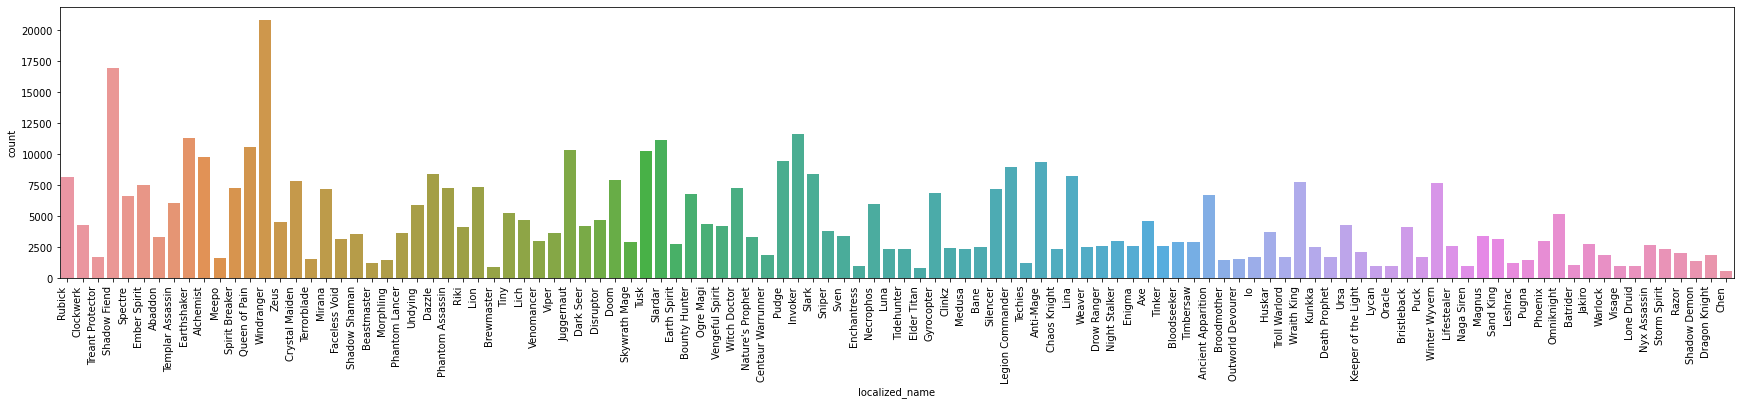

In [7]:
fig = plt.figure(figsize = (30, 5))
gr = sns.countplot(x = "localized_name", data = merged)
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

<h4>Распределение золота в минуту</h4>

<AxesSubplot:xlabel='gold_per_min', ylabel='Count'>

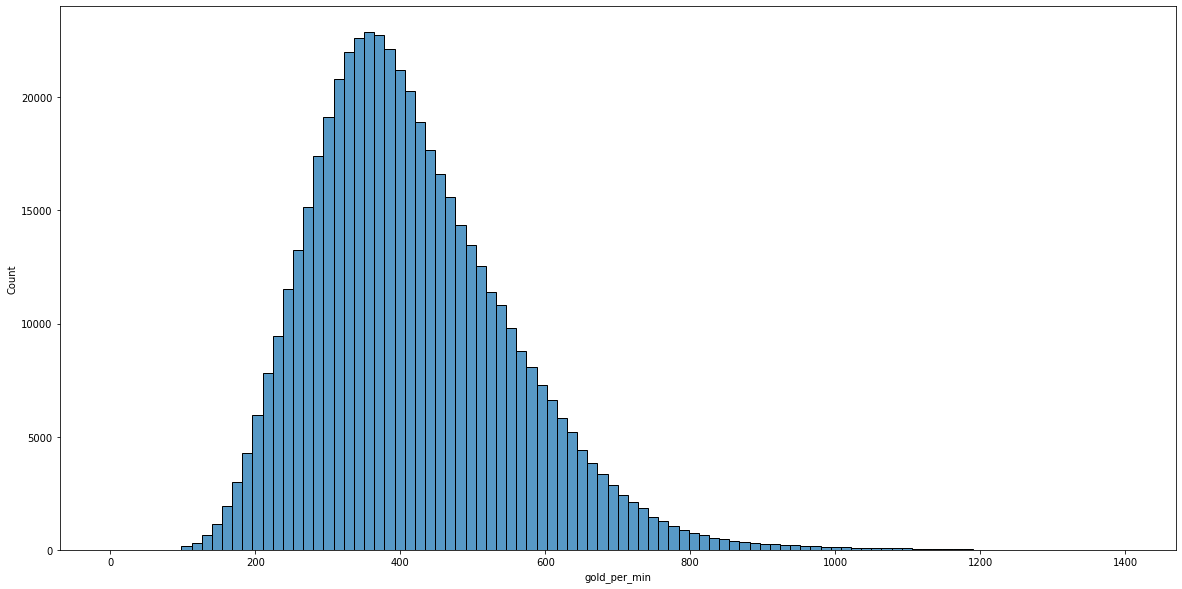

In [8]:
fig = plt.figure(figsize = (20,10))
sns.histplot(x = "gold_per_min", data = merged, bins = 100, binrange = (0, 1400))

<h4>График распределения игроков по командам и слотам в команде</h4>

<AxesSubplot:xlabel='player_slot', ylabel='count'>

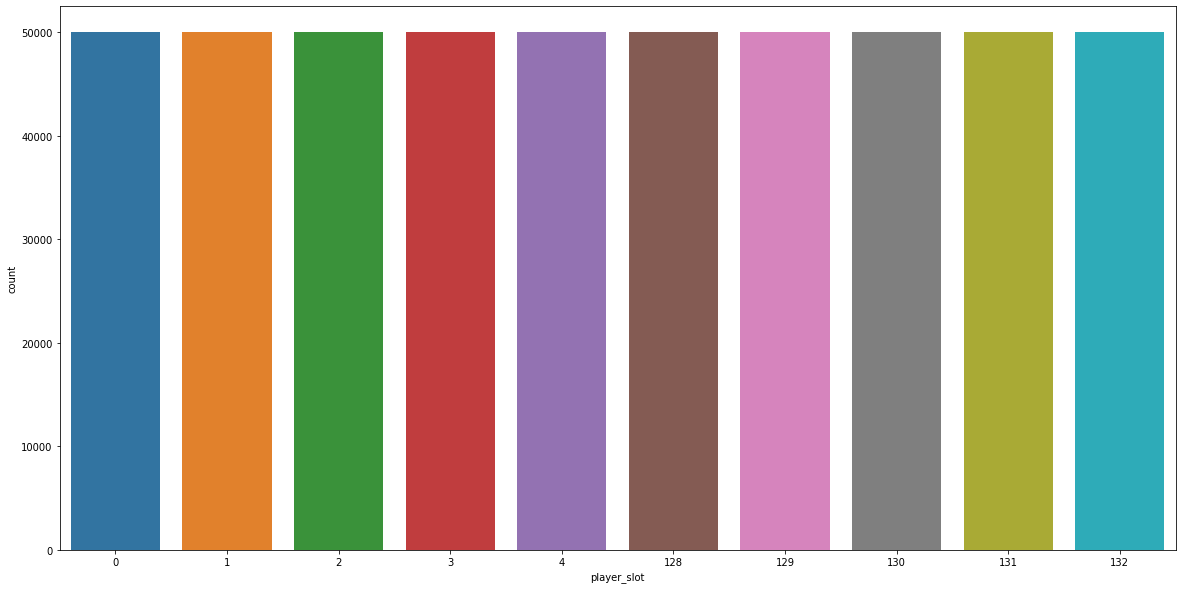

In [9]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = "player_slot", data = merged)

<h4>Распределение времени стана</h4>

<AxesSubplot:xlabel='stuns', ylabel='Count'>

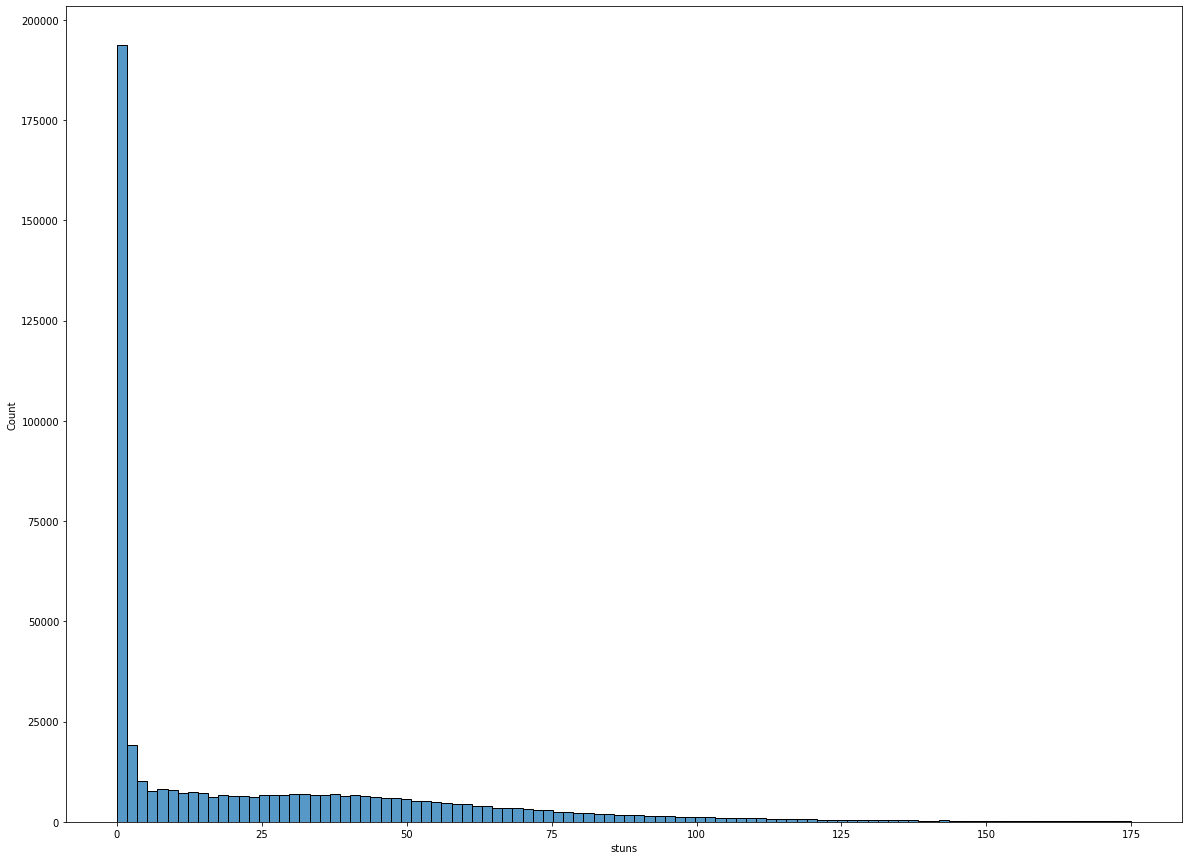

In [10]:
merged = merged.mask(merged.stuns == "None", "0")
merged.stuns = merged.stuns.astype(float);
fig = plt.figure(figsize = (20,15))
sns.histplot(x = "stuns", data = merged, bins = 100, binrange = (0, 175))

In [11]:
group_heroes = merged.groupby("localized_name")
for localized_name, g in group_heroes:
    print("Hero: {0:30} mean gpm: {1:10.10f}".format(localized_name, g["gold_per_min"].mean()))

Hero: 0                              mean gpm: 0.0000000000
Hero: Abaddon                        mean gpm: 445.8839662447
Hero: Alchemist                      mean gpm: 712.1417435897
Hero: Ancient Apparition             mean gpm: 313.5942275042
Hero: Anti-Mage                      mean gpm: 557.9484346225
Hero: Axe                            mean gpm: 429.0316455696
Hero: Bane                           mean gpm: 295.4092512740
Hero: Batrider                       mean gpm: 363.0742857143
Hero: Beastmaster                    mean gpm: 384.6831210191
Hero: Bloodseeker                    mean gpm: 499.0074906367
Hero: Bounty Hunter                  mean gpm: 412.7790594499
Hero: Brewmaster                     mean gpm: 399.6757049892
Hero: Bristleback                    mean gpm: 484.5454545455
Hero: Broodmother                    mean gpm: 511.9236641221
Hero: Centaur Warrunner              mean gpm: 387.4735991379
Hero: Chaos Knight                   mean gpm: 443.4058898848
Hero: Chen